<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Log_SA.jpeg"></a>

# Logistic Regression


Hi guys,<br>
Very warm welcome to the Logistic Regression with python using scikit-learn lecture. In the previos lecture, we have leaned the key concepts and working principle behind the Logistic Regression. Its time to learn by doing.<br>


Let's explore one of the most famous dataset ["Titanic: Machine Learning from Disaster"](https://www.kaggle.com/c/titanic/data) from kaggle. This dataset is considered the first step to wards classification in machine learning. <br>

A detailed description is provided on the dataset at [kaggle](https://www.kaggle.com/c/titanic/data).<br>

**Data Dictionary**
* PassengerId
* Survived -- 0 = No, 1 = Yes
* Pclass -- Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* Name -- Passenger name 
* Sex -- male / female 	
* Age -- age in years	
* SibSp -- no. of siblings / spouses aboard the Titanic	
* Parch -- no. of parents / children aboard the Titanic	
* Ticket -- Ticket number	
* Fare -- Passenger fare	
* Cabin -- Cabin number	
* Embarked -- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


In this classification problem, the goal is to predict if a passenger survived the sinking of the Titanic or not. <br>
First, we will do some exploratory data analysis and then use our understanding in logistic regression to train the model for classification. We then deploy our model on test dataset and see how well the model does predictions!<br>
&#9758; *You can directly download the test.csv and train.csv fro kaggle. The files are also included in the course material for your convenience.* <br>
Let's start the journey!

First thing first, let's import some libraries. At this stage, I am sure these libraries are not new to you!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # just optional!
%matplotlib inline

Let's read our training dataset "train_titanic.csv" into "train"

In [2]:
train = pd.read_csv('train_titanic.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis - EDA
Let's overview the dataset using `info()` first!

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Missing Data**<br>
So, we have 891 entries in our train dataset with column name on the traveler information along with other information such as passenger class (Pclass), Fare, Ticket Cabin etc. <br>
Notice, Age column have 714 non-null whereas Cabin have 204 non-null values. Embarked also have 889 non-null. So there is some data missing!<br> Let's do some calculation to find out the % of missing data in each column!<br>
Remember, we have a function `isnull()` in this situation!

In [5]:
#round((train.isnull().sum())/(train.isnull().count())*100,1)
pct_missing = round((train.isnull().sum())/(train.isnull().count())*100,1)
pct_missing.sort_values(ascending=False).head()

Cabin       77.1
Age         19.9
Embarked     0.2
Fare         0.0
Ticket       0.0
dtype: float64

We have the numbers now!<br>
* `Cabin` column is missing 77.1% of its data
* `Age` column is missing 19.9% of its data
* `Embarked` column is missing 0.2% of its data

*<font style="font-size:12px;color:green;">Recall and refresh your skills in dealing with missing data, we are going to use those skills at later stage</font>*

`isnull()` return `True` for all the places where the data is missing. Our dataset is large, we better think about graphical visualization using seaborn's heatmap method to visualization of missing data! <br>
Let's try!!

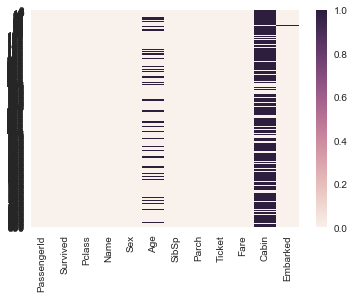

In [6]:
#train.isnull()
sns.heatmap(data=train.isnull())

This might be ok but visualization of our heatmap can be improved. `yticklabels` are overlapping and the color bar is also not useful in this case.<br>
We can set `yticklabels` and `cbar` to `False` and also use `cmap = 'viridis'` for cleaner map!<br>
Let's try again!

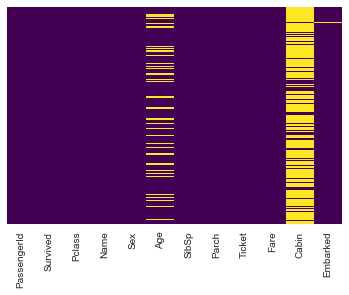

In [7]:
sns.heatmap(data=train.isnull(), yticklabels=False, 
            cbar=False, cmap='viridis' )

The map looks much better now.<br>
Notice, yellow are `True` which represent the missing data!<br><br>
**Well, we want to now more about the dataset<br>**
we can use `countplot()` to see how many survived and how many died!

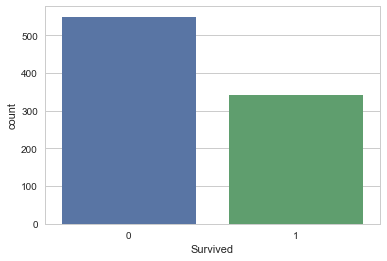

In [8]:
sns.countplot(x='Survived', data=train)#, palette='coolwarm')

It's sad that not many passengers survived! <br><br>
**Let's dig into little deeper, pass `hue = Sex` to see the female and male ratio in survived and died passengers**

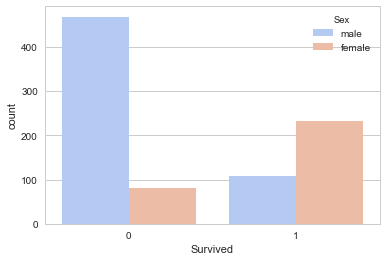

In [9]:
sns.countplot(x='Survived', hue='Sex',data=train, palette='coolwarm')

The plot suggests that not many males survived whereas, most of the females survived. <br><br>
**We can ask another question here!**<br>
We know there were three passenger classes in the titanic, which class survived the most?<br>
`nunique() or unique()` on `Pclass` and `hue = Pclass` can be useful!

In [10]:
# Let's check the no of classes again to re-confirm!
train['Pclass'].unique()

array([3, 1, 2])

Just a comment, you can use any color e.g. palette='coolwarm'/'rainbow' etc according to your choice, I am trying to keep things simpler here! 

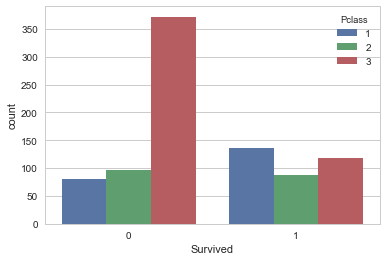

In [11]:
sns.countplot(x='Survived', hue='Pclass',data=train)

Excellent!<br>
We got even better understanding, now we know that more than half of the class-1 passenger survived whereas most of the class-3 passengers died.<br><br>
**Let's explore more and see what was the survival rate based on the Port of Embarkation?**

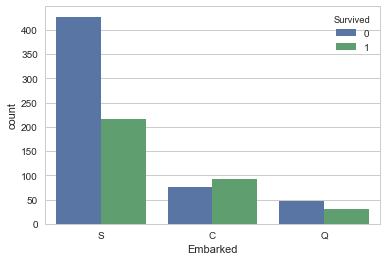

In [12]:
#sns.countplot(x='Parch',data=train, split=True)
sns.countplot(x='Embarked',data=train, hue='Survived')#hue='Pclass')

So, it looks like passenger the Southampton Port have a better chance of survival!<br><br>
This suggest <b>another question</b>, we may want to explore the class of the passenger and their port of embarkation.<br>
Let's pass `hue = 'Pclass'` now!

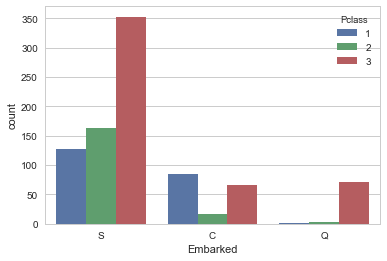

In [13]:
sns.countplot(x='Embarked',data=train, hue='Pclass')

We see, Southampton was actually the busiest port for each class! <br><br>

Further more, we can see how many passengers traveled with siblings/spouses and parent/children. We can plot a histogram to know how the age was distributed among the travelers. <br>
<font style="font-size:16px;color:green;">*I encourage you to ask questions to yourself and try to apply your EDA skills to learn more about the data. Use different types of plots along with your skills in interactive plotting - Recall the skills you acquired in data visualization section! <b>Practice is a key</b>*</font><br><br>
Let's get few more plots and then move on to the next step in which we will be getting our data ready for the machine learning model - Data Cleaning and Converting Categorical Features to dummy variables using pandas!

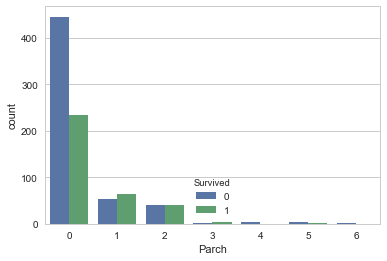

In [14]:
# Parch -- no. of parents / children aboard the Titanic
sns.countplot(x='Parch',data=train, hue='Survived')

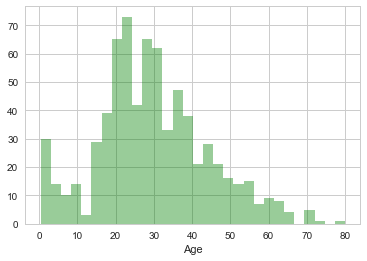

In [15]:
sns.distplot(train['Age'].dropna(),kde=False,color='green',bins=30)
#train['Age'].hist(bins=30,color='green',alpha=0.5)

**<font style="font-size:16px;color:green;">Looks like, it is getting long, let's split the lecture here and learn how to prepare the data to train our Machine Learning model in the next video</font>**



## Getting ready to train our Machine Learning model
### Data Cleaning
Remember, we have missing data! Let's deal with that data<br>
**`Age` column is missing ~ 19.9% of its data.**<br>
The appropriate and convenient way to fix 'Age' column is by filling the missing date with mean or average value of all passengers in the column. We can do even better in this case, becasue we know that their are three passenger classes, its better to use the average age for each missing passenger for its own class. <br>
Let's use a `boxplot()` method to explore if their is any relationship in class and passenger age?

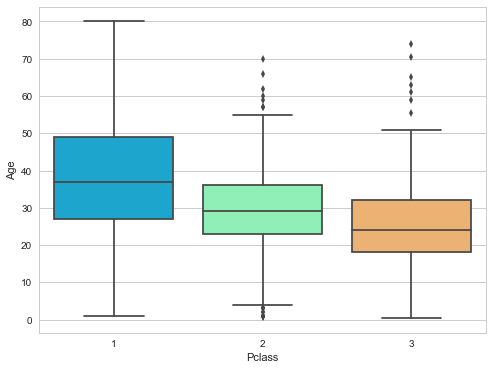

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass',y='Age',data=train, palette='rainbow')

Yes, `Pclass` and `Age` are related, this make some sense, the older the passenger is, the higher the class he traveled in! <br>
So our hypothesis to to fill the missing `Age` with respect to the passenger class is the better way to fill in missing data in `Age`!<br>
Before writing a function for this purpose, we may want to know the average age of the passenger for each class, **`groupby()` is usefull here!**<br><br>
Let's find the average age of the passenger in each class first, we only need `Pclass` and `Age` columns!

In [17]:
train[['Pclass','Age']].groupby('Pclass').mean() #describe()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


Now, we have average age for each class, let's write a custom function to fill in the missing values in `Age` columns. We will use if-else conditional statement in the function!

In [18]:
#defining a function 'impute_age'
def impute_age(age_pclass): # passing age_pclass as ['Age', 'Pclass']
    
    # Passing age_pclass[0] which is 'Age' to variable 'Age'
    Age = age_pclass[0]
    
    # Passing age_pclass[2] which is 'Pclass' to variable 'Pclass'
    Pclass = age_pclass[1]
    
    #applying condition based on the Age and filling the missing data respectively 
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [19]:
# Let's apply the function to our data
# axis = 1 becasue we want to apply this across the column
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
# Let's revise the 'impute_age' function and the statement above! 

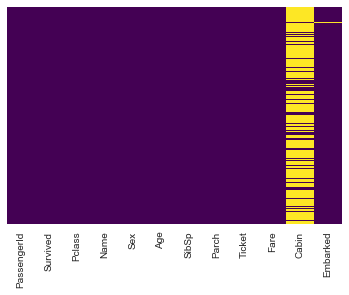

In [20]:
# Let's try to re-plot the heatmap now!
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

So, we got this done, no more yellow color for Age means we have filled all the missing data accordingly!

**`Cabin` column is missing ~ 77.1% of its data.**<br>
This is to much missing data, we can drop this column!

In [21]:
train.drop('Cabin',axis=1,inplace=True)

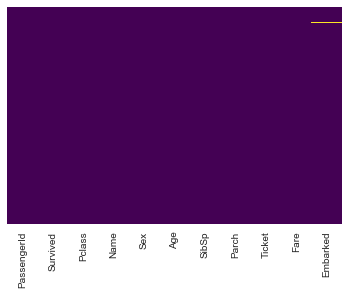

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

So, we don't have `Cabin` Column in our data now, only yellow color is for `Embarked` column. This is only 0.2%<br>
Let's drop any other missing value in the dataset now, this will essentially drop the row for missing `Embarked` data. We will re-plot the heatmap after this operation.

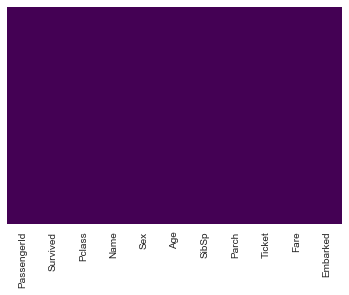

In [23]:
train.dropna(inplace=True)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! We don't have any missing data in our dataset now!<br>
It's time to deal with the Categorical Features now!<br><br>
### Dealing with Categorical Features
To apply Machine Learning algorithm, we need to convert categorical variable into some indicator variables. <br>
For example, in `Sex` column for female/male, we need to input 0/1 to make the Machine Learning model work. For this, we will create a new column indicating the `Sex` as 0/1 for female/male, this process is called <font style="font-size:14px;color:green;">***creating dummies***</font>. This is important because the Machine Learning model will not take string variable as input to work with.<br><br>
Fortunately, pandas makes this process very easy for us. Using pandas  built-in method <b>[`pandas.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)</b>, we can convert categorical variable into dummy/indicator variables.<br>

Let's pass the `Sex` column and see how it works!

In [24]:
sex = pd.get_dummies(train['Sex'])
sex.head(3)

,female,male
0,0,1
1,1,0
2,1,0


Notice that, we get a dataframe for every single category with 0 or 1 as an indicator value (a column for female and a column for male here). <br>
In this case, one column is a perfect predictor for the other. For example, if female is 0 then it is obvious that male is 0 and vice versa. This means, if we input both columns to our Machine Learning algorithm, our algorithm will immediately know that if it's 0 for female then I can perfectly predict it's going to be i for the male. This is know as <b>[Multi-Collinearity](https://en.wikipedia.org/wiki/Multicollinearity)</b> and will mess up with our Machine Learning algorithm, because some columns will be the perfect predictor for the other columns.<br>
**To avoid [Multi-Collinearity](https://en.wikipedia.org/wiki/Multicollinearity) issue, we need to set `drop_first = True` (it is `Flase` by default) in the method `get_dummies()` while creating dummies.**  

In [25]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head(3)

,male
0,1
1,0
2,0


So, this is what we want to input to our Machine Learning algorithm! <br>
Let's do the similar process to `Embarked` columns!

In [26]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


So, if Q is 0, S is 0, the Machine Learning algorithm can predict C is 1 because at one time, a passenger can use one port only so Q, S or C, only one can be 1/True. <br><br>
Now, we have dummies in sex and embark for our categorical variables, let's use concatenation method to add these to the train data!<br>
We will pass the list of dataframes `[train, sex, embark]` to `concat()` method and set axis = 1 as adding new columns. 

In [27]:
train = pd.concat([train,sex,embark],axis=1)

In [28]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


We got new columns `male, Q, S` in our dataframe as replacement columns for `Sex` and `Embarked` to input to our Machine Learning algorithm. We don't need `Sex` and `Embarked` columns anymore. We will also not use `Ticket` and `Name` columns in this project, this information is not much helpful at this stage.<br>

&#9758; <font style="font-size:12px;color:green;"> If we want, later on, we can do feature engineering to create new features such as grabbing the first letter in the Ticket, prefix the Name (Mr., Mrs. etc) or last_name and so on....</font><br> 

Let's drop `Sex, Embarked, Ticket, Name` columns for our dataframe/dataset.

In [29]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [30]:
train.head(2)
#train.tail(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0


Notice, we can drop another column `PassengerId`. This is essentially just an index that starts at 1. It is numerical but not very useful for us to predict weather the passenger survived or not. Let's drop this column as well!

In [31]:
train.drop('PassengerId', inplace=True, axis=1)

In [32]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


### Excellent!
Our data is ready to train our Machine Learning algorithm. <br>
We did the following steps:
* fixed the missing data issue
* created dummies for categorical features
* dealt with Multi-Collinearity issue
* dropped the columns we don't need

**Let's move on to build and train Logistic Regression Model for our data!**


## Model Building - Logistic Regression
Our dataset is ready for building a Logistic Regression Model. We will take `train` as all of our data and split it into train and test dataset using `train_test_split()` method in `sklearn`. 

&#9758; <font style="font-size:12px;color:green;"> Remember, we have a separate file `test_titanic.csv` for the test data. To deploy trained model on test.csv, we need to repeat all the processing on `test.csv` (same way, we did on train_titanic.csv). You can play with this once you are comfortable with the process.</font>

### Train Test Split
Let's pass features to X and target to y. Survived is our target column whereas all other are features!

In [33]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [34]:
# Importing required method from sklearn
from sklearn.model_selection import train_test_split

In [35]:
# Let's keep the default size and states
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

### Training
Let's import `LogisticRegression` from `linear_model` family in `sklearn` and create its instance!

In [36]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()

In [37]:
# Training the model on our training dataset -- shift+tab for doc string
logR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predictions
Out model is trained on the given dataset, default parameters are shown above.<br>
Let's get the predictions for our test dataset from trained model `logR`

In [38]:
predictions = logR.predict(X_test)

### Evaluation 
Evaluation process has its own importance, we want our model to be as good as possible in predictions. scikit-learn provides a very nice and efficient way to evaluate classification tasks using its `classification_report` module. <br>
Let's import this module and use for evaluation<br>

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.83      0.86      0.85       184
          1       0.76      0.71      0.73       110

avg / total       0.80      0.81      0.80       294



The classification report outputs the precision, recall, f1-score and support cases for each class along with their averages.<br>
It all up to us, if we don't want the classification report and interested in the confusion matrix to calculate any specific value, we can get that one as well.<br>
Let's get the pure confusion matrix.

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
# Let's pass the y_test and predictions to get the confusion_matrix
print(confusion_matrix(y_test, predictions))

[[159  25]
 [ 32  78]]


&#9758; In this project, we have done lots of steps that we do as a Data Scientist on real life datasets. Most of the times, we clean the data and transform it into an acceptable form for the Machine Learning algorithm. You have notice that the Machine Learning libraries are quite simple and straight forward to use. We spend significant time in data cleaning and preparation.<br>

&#9758; Considering the amount of data we have used in this section, the results are not very bad, however they are not very good as well. They can be improved for the same model if you use both `test_features_titanic.csv` and `train_titanic.csv` datasets. Please note, `test_features_titanic.csv` is missing `Survived` column. `test_target_titanic.csv` contain the `Survived` column for test data, which is also a part of course material.<br><br>

&#9989; <font style="font-size:14px;color:green;">I have changed the names of the file for easier to spot, kaggle have different file names for the same data files.</font>

&#9989; <font style="font-size:14px;color:green;">Several among you may want to use a single file, for your convenience, I have also combined all the available data into a single .csv file `titanic_full.csv`. The file have 1309 entries and is included in the course material for you to practice your skills. Let's see if you can improve the model for better predictions.</font><br>

**Few thing that you may want to consider while practicing:**<br>
* Notice that the `Pclass` column is actually a categorical column, you only have three classes. You can get dummies for `Pclass` column as well. Try getting dummies for `Pclass` column and re-run the Machine Learning section to see the difference in you results. This would also be a good practice exercise. You will also learn how the Machine Learning algorithm treat a column as a category versus a continuous variable. 
* Do you think that you can get any information from the `Ticket` or any other column.
* Grab the prefix/title (Mr. Mrs. Dr. etc) from `Name` as a feature

Titanic dataset is very popular for Classification problem and their are number of [good kernels on kaggle](https://www.kaggle.com/c/titanic/kernels). Check the Python ones, you may get an idea to improve your model.<br>
The kernels in other languages such as **R** are also useful, you can get an idea on data cleaning, plotting and some feature engineering that you can implement in Python as well. 
# Good Luck! 
## You did a wonderful job so far!